In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
%matplotlib inline
# import stats as sts 

In [2]:
#read analyst actuals file
column_names1 = ['TICKER','ANNDATS','quarternum','earn_value']
df_actual_ern=pd.read_csv("../AFE_data/df_actual_ern.csv", header = None, names = column_names1)
#df_actual_ern = pd.read_csv('/Users/Blair/Downloads/AFE_data/df_actual_ern.csv')
#read analyst forecast file
column_names2 = ['TICKER','ANNDATS','quarternum','analyst','forecast_value']
df_aforcast=pd.read_csv("../AFE_data/df_aforecast.csv", header = None, names = column_names2)
#df_aforecast = pd.read_csv('/Users/Blair/Downloads/AFE_data/df_aforecast.csv')

In [3]:
#Set Year
df_actual_ern['year'] = df_actual_ern['ANNDATS'].apply(lambda x: str(x)[:4])

df_aforcast['year'] = df_aforcast['ANNDATS'].apply(lambda x: str(x)[:4])

In [4]:
df_aforcast.ANNDATS.astype('float').min()

19930930.0

In [5]:
len(df_actual_ern.ANNDATS.unique())

7032

In [6]:
#Merge two datasets
merged = pd.merge(df_aforcast,df_actual_ern,how = 'inner', on = ['TICKER','quarternum','year'])
merged.head()

,TICKER,ANNDATS_x,quarternum,analyst,forecast_value,year,ANNDATS_y,earn_value
0,AA,19980930,2,478,0.675,1998,19980707,0.930
1,AA,19990630,1,297,0.750,1999,19990407,0.900
2,AA,19991231,3,56581,1.410,1999,19991006,1.035
3,AA,20010331,0,610,1.320,2001,20010108,1.350
4,AA,20011231,3,40316,1.050,2001,20011004,1.170


In [7]:
#Surprise Matrics
merged.index = merged[['TICKER', 'year','quarternum']]

df=merged.reset_index()
merged['meadian']=df.groupby('index').forecast_value.median()
merged['mean']=df.groupby('index').forecast_value.mean()
merged['std']=df.groupby('index').forecast_value.std()
merged['delta_mm']=merged['meadian']-merged['mean']

In [8]:
#Median forecast - actual
merged['surprise_median_fa']=(merged['earn_value']-merged['meadian'])/merged['std']
#Mean forecast - actual
merged['surprise_mean']=(merged['earn_value']-merged['mean'])
merged['surprise_mean_fa']=(merged['earn_value']-merged['mean'])/merged['std']

In [9]:
merged_cleaned = merged[merged['std']>0]


print('with 0 std',merged.shape)
print('0 std removed',merged_cleaned.shape)


with 0 std (26042, 15)
0 std removed (21015, 15)


In [10]:
merged['earn_diff'] = (merged['earn_value']-merged['mean'])

In [11]:
merged['y-q'] = merged['year'].astype('float') + merged['quarternum']/10.

In [12]:
diff_df = merged[abs(merged['earn_diff'])<500.].groupby('y-q').agg({'earn_diff':'mean'})

In [13]:
diff_df.columns = ['Mean']

In [14]:
diff_df['Dispersion'] = merged[abs(merged['earn_diff'])<500.].groupby('y-q').agg({'earn_diff':'std'})

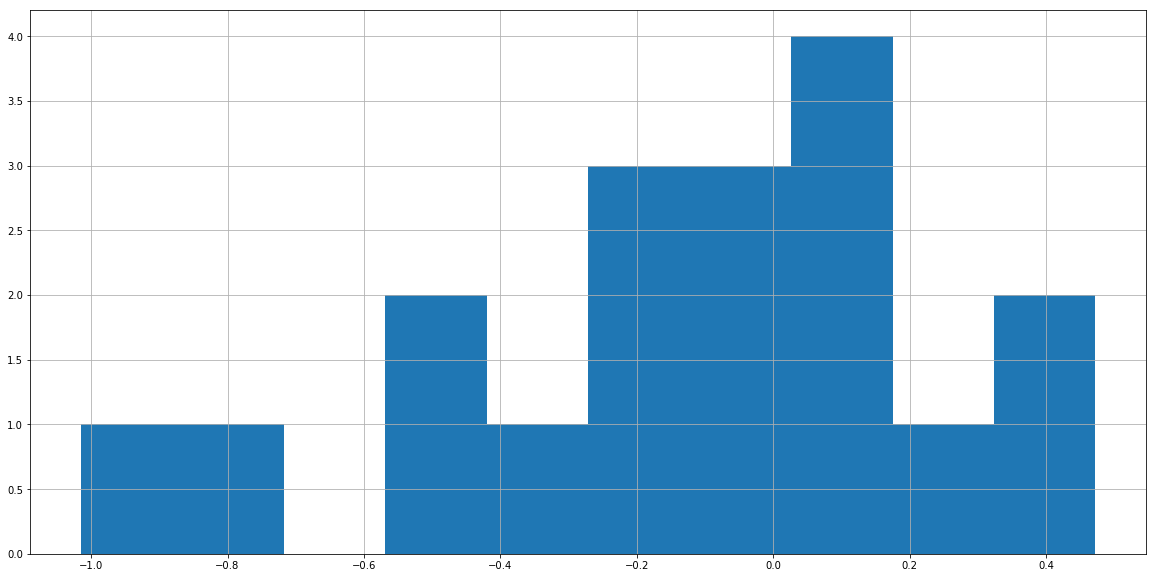

In [15]:
diff_df[(diff_df['Dispersion'] - diff_df['Dispersion'].mean())/ diff_df['Dispersion'].std()>0]['Mean'].hist(figsize=[20,10])

In [16]:
diff_df[(diff_df['Dispersion'] - diff_df['Dispersion'].mean())/ diff_df['Dispersion'].std()>0]['Mean'].describe()

count    18.000000
mean     -0.138709
std       0.383103
min      -1.014811
25%      -0.270289
50%      -0.056700
75%       0.119330
max       0.472055
Name: Mean, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f07e0483828>]], dtype=object)

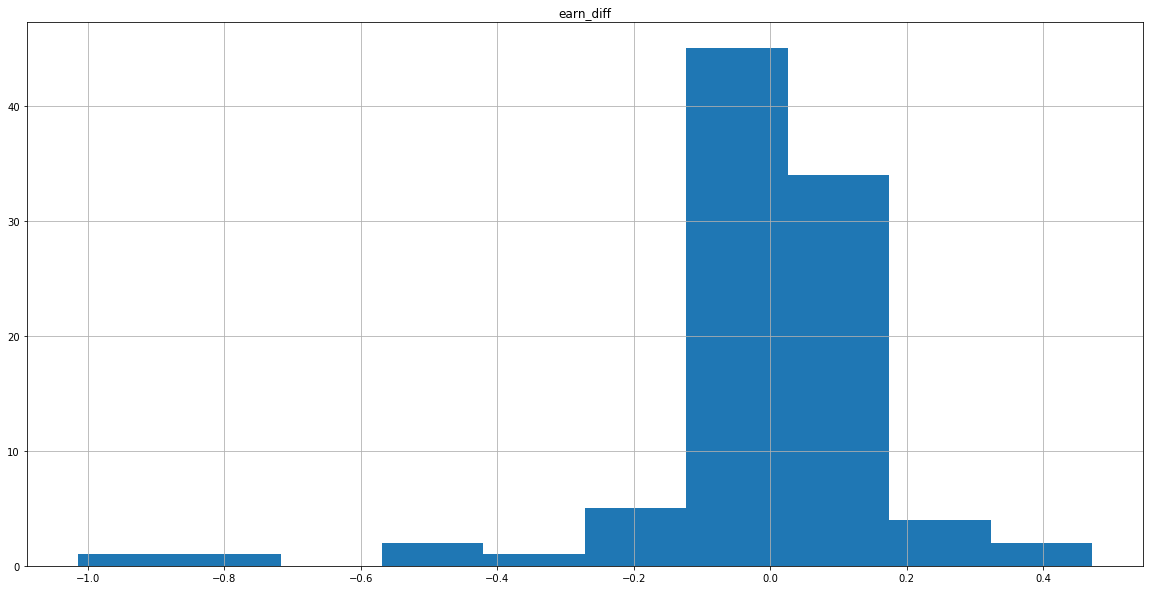

In [17]:
merged[abs(merged['earn_diff'])<500.].groupby('y-q').agg({'earn_diff':'mean'}).hist(figsize=[20,10])

In [18]:
merged[abs(merged['earn_diff'])<500.].groupby('y-q').agg({'earn_diff':'mean'}).describe()

,earn_diff
count,95.000000
mean,-0.010083
std,0.189098
min,-1.014811
25%,-0.048998
50%,0.006370
75%,0.064981
max,0.472055


In [19]:
diff_df['Mean'].describe()

count    95.000000
mean     -0.010083
std       0.189098
min      -1.014811
25%      -0.048998
50%       0.006370
75%       0.064981
max       0.472055
Name: Mean, dtype: float64

In [75]:
#the skewness of the distribution:median_mean
merged_cleaned['skew']=merged_cleaned['delta_mm']/merged_cleaned['delta_mm'].std()
#the kurtosis of the distribution



/home/jasonmellone/anaconda2/envs/py3dsqf/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [76]:
merged_cleaned

,TICKER,ANNDATS_x,quarternum,analyst,forecast_value,year,ANNDATS_y,earn_value,meadian,mean,std,delta_mm,surprise_median_fa,surprise_mean,surprise_mean_fa,skew,kurtosis_mean,kurtosis_median,rank
"(AA, 2004, 0)",AA,20040331,0,478,1.260,2004,20040108,0.81,1.260,1.230000,0.051962,0.030000,-8.660254,-0.420000,-8.082904,0.135323,172.112483,171.736853,18953.0
"(AA, 2004, 0)",AA,20040331,0,20310,1.170,2004,20040108,0.81,1.260,1.230000,0.051962,0.030000,-8.660254,-0.420000,-8.082904,0.135323,172.112483,171.736853,18954.0
"(AA, 2004, 0)",AA,20040331,0,80731,1.260,2004,20040108,0.81,1.260,1.230000,0.051962,0.030000,-8.660254,-0.420000,-8.082904,0.135323,172.112483,171.736853,18955.0
"(AA, 2004, 1)",AA,20040630,1,478,1.410,2004,20040406,1.11,1.410,1.430000,0.062450,-0.020000,-4.803845,-0.320000,-5.124101,-0.090215,172.112483,171.736853,2596.0
"(AA, 2004, 1)",AA,20040630,1,20310,1.500,2004,20040406,1.11,1.410,1.430000,0.062450,-0.020000,-4.803845,-0.320000,-5.124101,-0.090215,172.112483,171.736853,2597.0
"(AA, 2004, 1)",AA,20040630,1,80731,1.380,2004,20040406,1.11,1.410,1.430000,0.062450,-0.020000,-4.803845,-0.320000,-5.124101,-0.090215,172.112483,171.736853,2598.0
"(AA, 2004, 2)",AA,20040930,2,80731,1.500,2004,20040707,1.38,1.170,1.246667,0.132571,-0.076667,1.584060,0.133333,1.005752,-0.345824,172.112483,171.736853,887.0
"(AA, 2004, 2)",AA,20040930,2,478,1.380,2004,20040707,1.38,1.170,1.246667,0.132571,-0.076667,1.584060,0.133333,1.005752,-0.345824,172.112483,171.736853,888.0
"(AA, 2004, 2)",AA,20040930,2,478,1.140,2004,20040707,1.38,1.170,1.246667,0.132571,-0.076667,1.584060,0.133333,1.005752,-0.345824,172.112483,171.736853,889.0
"(AA, 2004, 2)",AA,20040930,2,48907,1.140,2004,20040707,1.38,1.170,1.246667,0.132571,-0.076667,1.584060,0.133333,1.005752,-0.345824,172.112483,171.736853,890.0


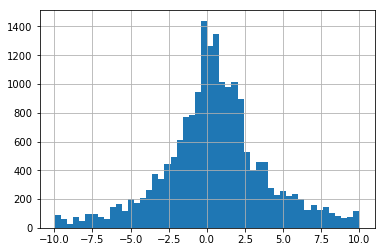

In [21]:
merged_cleaned[abs(merged_cleaned.surprise_median_fa)<10]['surprise_median_fa'].hist(bins=50)

In [22]:
merged_cleaned['kurtosis_mean']=merged_cleaned['surprise_mean_fa'].kurt()
merged_cleaned['kurtosis_median']=merged_cleaned['surprise_median_fa'].kurt()

/home/jasonmellone/anaconda2/envs/py3dsqf/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/jasonmellone/anaconda2/envs/py3dsqf/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


●	How do your pre-post earnings price time series from the previous section look as a function of conditioning on different values of the surprise metrics (and distribution metrics) above?

In [23]:
price_distributions = pd.read_csv('../AFE_data/df_prc_dist.csv')
# del price_distributions['Unnamed: 0']
# del price_distributions['quarternum']

In [24]:
price_distributions

,Unnamed: 0,TICKER,ANNDATS,quarternum,-30,-29,-28,-27,-26,-25,...,21,22,23,24,25,26,27,28,29,30
0,0,ABBV,20130426,1,0.8399,0.8325,0.8368,0.8521,0.8397,0.8501,...,NaN,0.9902,0.9572,0.9719,0.9313,0.9459,0.9518,0.9389,0.9490,0.9599
1,1,ABBV,20130726,2,0.9647,0.9603,0.9721,0.9609,0.9167,0.9516,...,0.9701,0.9518,0.9502,0.9516,0.9513,NaN,0.9509,0.9629,0.9714,0.9799
2,2,ABBV,20131025,3,0.9105,0.9294,0.9655,0.9720,0.9615,0.9704,...,0.9819,0.9858,0.9787,NaN,0.9828,0.9815,1.0136,1.0075,1.0093,1.0416
3,3,ABBV,20140131,0,1.0683,1.0680,1.0636,NaN,1.0764,1.0674,...,1.0175,1.0479,1.0502,1.0571,1.0453,1.0494,1.0512,1.0490,1.0425,1.0402
4,4,ABBV,20140425,1,1.0421,1.0578,1.0806,1.0808,1.0924,1.0879,...,NaN,1.0987,1.1003,1.0995,1.1056,1.1020,1.1064,1.1107,1.1254,1.1213
5,5,ABBV,20140725,2,1.0184,1.0154,1.0211,1.0261,1.0190,1.0023,...,1.0506,1.0483,1.0474,1.0455,1.0395,NaN,1.0355,1.0438,1.0444,1.0519
6,6,ABBV,20141031,3,0.9307,0.9251,0.9070,0.9305,0.9140,0.9327,...,1.0890,1.0916,1.0794,1.0963,1.0985,1.0939,1.0895,1.0649,1.0563,1.0285
7,7,ABBV,20150130,0,1.1220,1.1097,1.0663,1.0971,NaN,1.1099,...,1.0018,0.9879,0.9987,0.9422,0.9220,0.9203,0.9253,0.9382,0.9611,0.9611
8,8,ABBV,20150423,1,0.9027,0.9027,0.9202,0.9296,0.9321,0.9524,...,1.0191,NaN,1.0288,1.0487,1.0501,1.0364,1.0417,1.0369,1.0430,1.0493
9,9,ABBV,20150724,2,0.9849,0.9828,0.9808,0.9954,1.0132,1.0206,...,0.9320,0.8917,0.9274,0.9476,0.9398,0.9167,0.8887,0.8957,0.9045,0.8779


In [25]:
price_distributions['year'] = price_distributions['ANNDATS'].apply(lambda x: str(x)[:4])

In [26]:
merged_cleaned.head(2)

,TICKER,ANNDATS_x,quarternum,analyst,forecast_value,year,ANNDATS_y,earn_value,meadian,mean,std,delta_mm,surprise_median_fa,surprise_mean,surprise_mean_fa,skew,kurtosis_mean,kurtosis_median
"(AA, 2004, 0)",AA,20040331,0,478,1.26,2004,20040108,0.81,1.26,1.23,0.051962,0.03,-8.660254,-0.42,-8.082904,0.135323,172.112483,171.736853
"(AA, 2004, 0)",AA,20040331,0,20310,1.17,2004,20040108,0.81,1.26,1.23,0.051962,0.03,-8.660254,-0.42,-8.082904,0.135323,172.112483,171.736853


In [56]:
def slice_population_on_variable_for_charts(merged_cleaned,col = 'surprise_mean_fa'):
    merged_cleaned['rank'] = merged_cleaned[col].rank(method='first')
    qs,bins = pd.qcut(merged_cleaned['rank'],10,retbins=True)
    quantile_dfs = []
    quantile_populations = {}
    for i in range(0,len(bins)-1):
        print(i,bins[i],bins[i+1])

        quantile_filtered_earnings = merged_cleaned[(merged_cleaned['rank']>=bins[i])& 
                                                    (merged_cleaned['rank']<bins[i+1])].copy()
        
        quantile_filtered_earnings = quantile_filtered_earnings[['TICKER','year','quarternum']].drop_duplicates()

        price_drift_df = pd.merge(quantile_filtered_earnings,price_distributions,on=['TICKER','year','quarternum'])

        df = price_drift_df[list(map(str,list(range(-30,31,1))))].mean().copy()
        df.name = 'quantile_' + str(i)

        quantile_populations[i] = price_drift_df[list(map(str,list(range(-30,31,1))))].copy()

        quantile_dfs.append(df)

    return {'quantile_dfs':quantile_dfs,'quantile_populations':quantile_populations}


In [57]:
merged_cleaned.columns

Index(['TICKER', 'ANNDATS_x', 'quarternum', 'analyst', 'forecast_value',
       'year', 'ANNDATS_y', 'earn_value', 'meadian', 'mean', 'std', 'delta_mm',
       'surprise_median_fa', 'surprise_mean', 'surprise_mean_fa', 'skew',
       'kurtosis_mean', 'kurtosis_median', 'rank'],
      dtype='object')

In [139]:
df = slice_population_on_variable_for_charts(merged_cleaned=merged_cleaned,col='std')['quantile_dfs']
df = pd.concat(df,axis=1)

# df[1]

0 1.0 2102.4
1 2102.4 4203.8
2 4203.8 6305.2
3 6305.2 8406.6
4 8406.6 10508.0
5 10508.0 12609.4
6 12609.4 14710.8
7 14710.8 16812.2
8 16812.2 18913.6
9 18913.6 21015.0


/home/jasonmellone/anaconda2/envs/py3dsqf/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


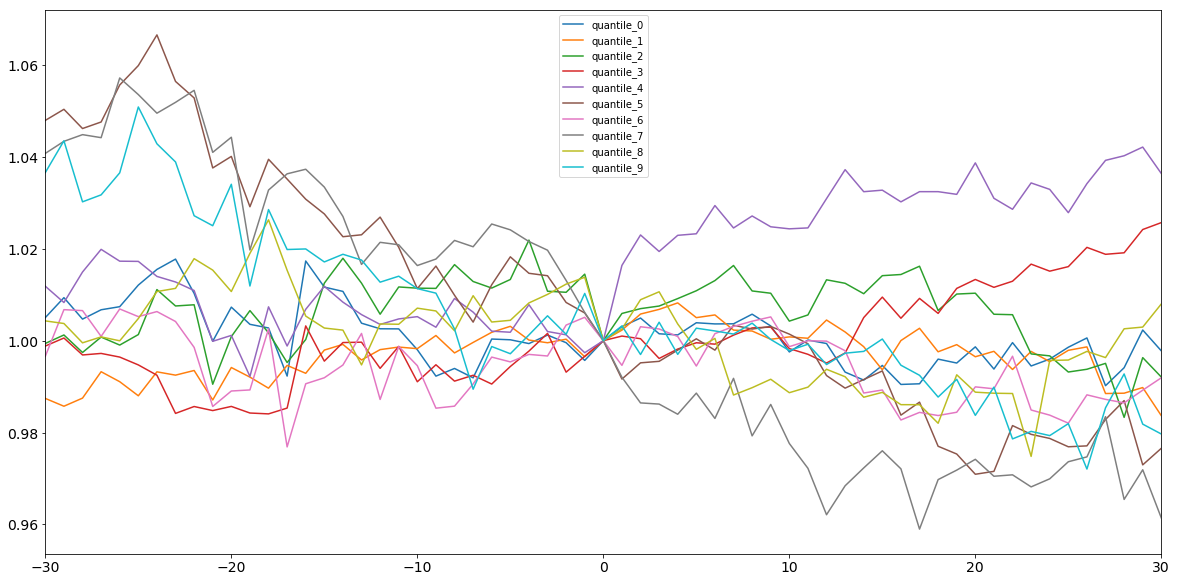

In [140]:

df.index = list(map(float,df.index))
(df).plot(figsize=[20,10],fontsize=14)

In [141]:
df_high = df[['quantile_5', 'quantile_6', 'quantile_7', 'quantile_8', 'quantile_9']].mean(axis=1)

In [142]:
df_high.name = 'Top 50th'

In [143]:
df_low = df[['quantile_0', 'quantile_1', 'quantile_2', 'quantile_3', 'quantile_4']].mean(axis=1)
df_low.name = 'Bottom 50th'

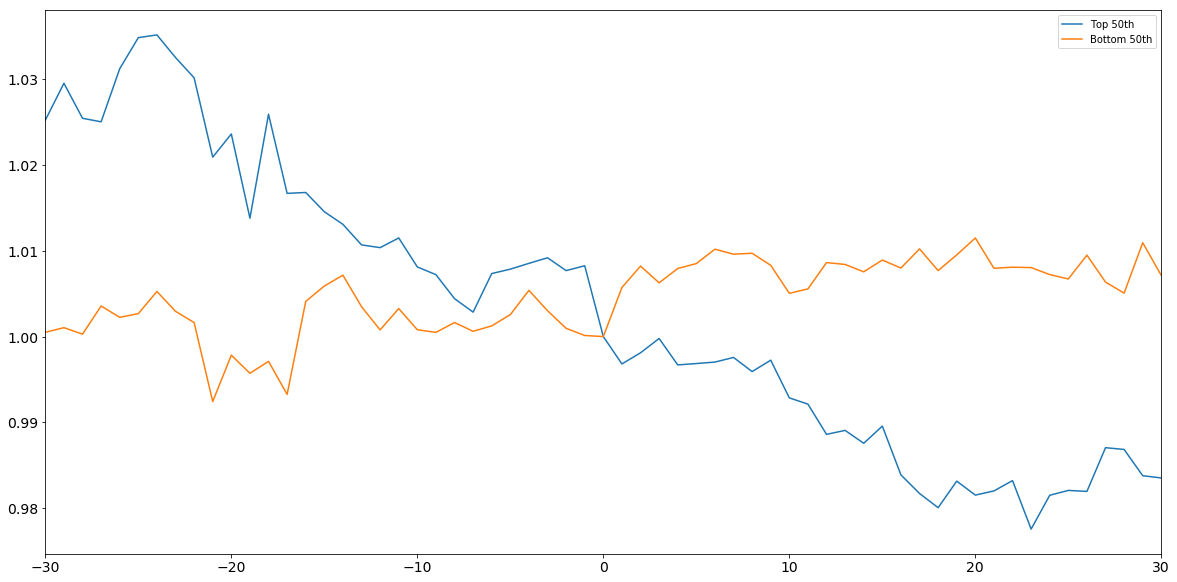

In [144]:
pd.concat([df_high,df_low],axis=1).plot(figsize=[20,10],fontsize=14)

In [145]:
float(df_low.tail(1))/float(df_low.head(1))-1

0.0066121472973244

In [146]:
float(df_high.tail(1))/float(df_high.head(1))-1

-0.040702211984309566

<h2>Earnings quantile sorted mean surprise - pre drift</h2>

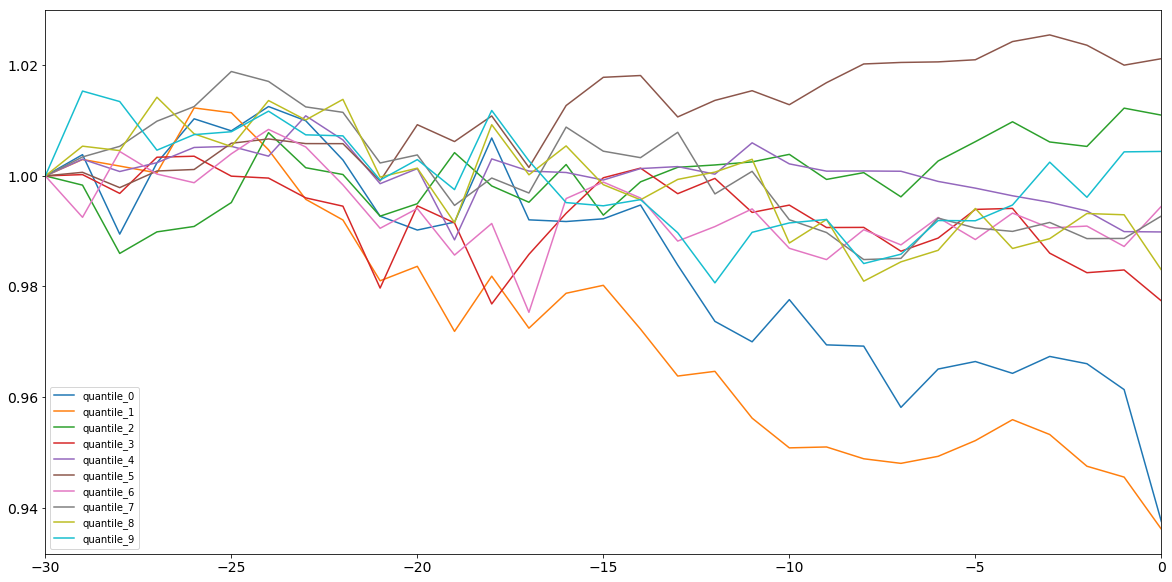

In [72]:
(df[df.index<=0]/df.iloc[-61]).plot(figsize=[20,10],fontsize=14)

<h3>Performance pre drift spread</h3>

In [73]:
(df[df.index<=0]/df.iloc[-61]).ix[0]['quantile_9']-(df[df.index<=0]/df.iloc[-61]).ix[0]['quantile_0']

/home/jasonmellone/anaconda2/envs/py3dsqf/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0.066917440343104317

<h2>Quantile Sorted Mean Surprise Post drift</h2>

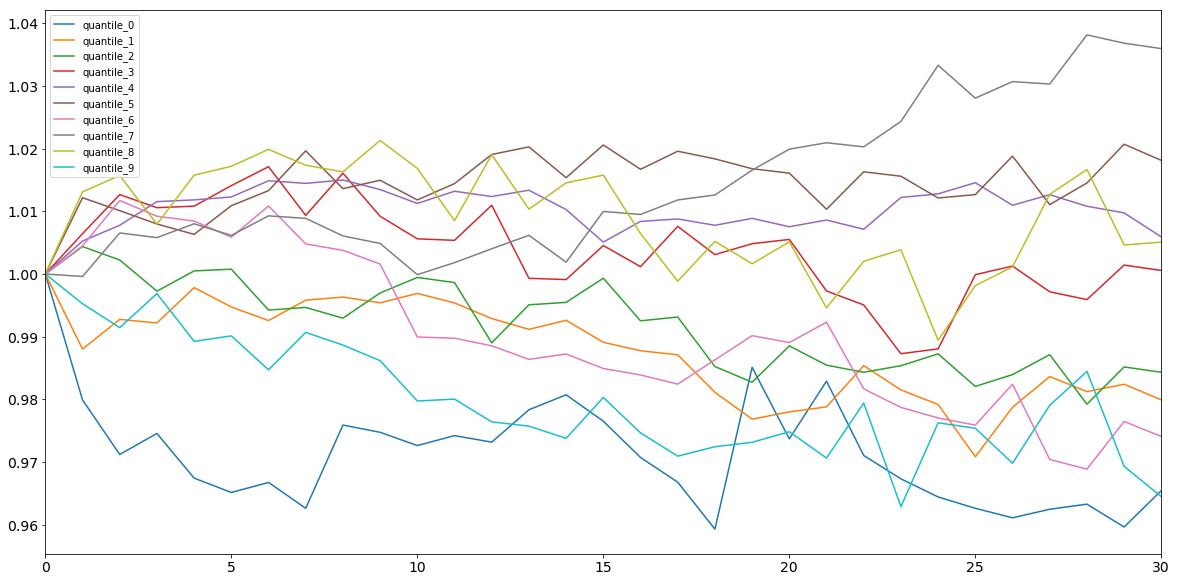

In [74]:
(df[df.index>=0]).plot(figsize=[20,10],fontsize=14)

<h3>Performance post drift spread</h3>

In [36]:
(df[df.index>=0]).iloc[-1]['quantile_9']-(df[df.index>=0]).iloc[-1]['quantile_0']

-0.025433517241379544